# Handling of Categorical Data's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("F:/files/mercedes benz/train.csv")

# First Analyze the data.. What's going on their

#### First We see the encoding for Norminal variables

In [3]:
data.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

In [5]:
data

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [6]:
dic = {}
for i in data.columns:
    print(i , ":\n", data[i].value_counts())
    dic.update({i : len(data[i].unique())})
    

X0 :
 z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
k      11
b      11
au     11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
ab      1
g       1
Name: X0, dtype: int64
X1 :
 aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
ab      3
d       3
q       3
Name: X1, dtype: int64
X2 :
 as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      2

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
 7   X8      4209 non-null   object
dtypes: object(8)
memory usage: 263.2+ KB


In [8]:
data.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X8    0
dtype: int64

In [9]:
dic

{'X0': 47, 'X1': 27, 'X2': 44, 'X3': 7, 'X4': 4, 'X5': 29, 'X6': 12, 'X8': 25}

#X4 having only 4 cata's..
#Do one hot Encoding for that X3 variable

# One Hot Encoding

In [10]:
df = data.copy()

In [11]:
X3_dummy = pd.get_dummies(df['X3'], drop_first = True)

In [12]:
X3_dummy

,b,c,d,e,f,g
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
4204,0,1,0,0,0,0
4205,0,0,1,0,0,0
4206,0,0,0,0,0,0
4207,0,0,0,0,1,0


In [13]:
df = pd.concat([df,X3_dummy], axis = 1)

In [14]:
df

,X0,X1,X2,X3,X4,X5,X6,X8,b,c,d,e,f,g
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,1,0,0
2,az,w,n,c,d,x,j,x,0,1,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,1,0
4,az,v,n,f,d,h,d,n,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,1,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,1,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,0,0,1,0


#This is one way of encoding Cata's. Its good, only we have less number of labels

# One hot Encoding with many Cata

In [15]:
df = data.copy()

In [16]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [17]:
dic

{'X0': 47, 'X1': 27, 'X2': 44, 'X3': 7, 'X4': 4, 'X5': 29, 'X6': 12, 'X8': 25}

In [18]:
#we take X0 for this encoding

In [19]:
df = df[['X0']]

In [20]:
df.value_counts()
#from this taking top ten counts for creating dummies... anothers are eliminated

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
aw     16
l      16
ad     14
k      11
b      11
au     11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
dtype: int64

In [21]:
X0_lst = df['X0'].value_counts().index[0:15]


In [22]:
def hot_encoding(df, var, lst):
    for i in lst:
        df[var + "_" + i] = np.where(df[var] == i, 1 , 0 )

In [23]:
hot_encoding(df, 'X0', X0_lst)

In [24]:
df

,X0,X0_z,X0_ak,X0_y,X0_ay,X0_t,X0_x,X0_o,X0_f,X0_n,X0_w,X0_j,X0_az,X0_aj,X0_s,X0_ap
0,k,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,k,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,az,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,az,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,az,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4205,j,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4206,ak,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4207,al,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


It deletes more information of the dataset, its an disadvantage

# Mean Encoding

In [25]:
#mean encoding is done only based on the y value of the dataset

In [26]:
data = pd.read_csv("F:/files/Titanic.csv")

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df = data.copy()

In [32]:
#from this we take cabin column for this encoding
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [34]:
df['Cabin'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [35]:
mean_for_cab = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [36]:
mean_for_cab

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'T': 0.0,
 'n': 0.29985443959243085}

In [37]:
df['Cabin'] = df['Cabin'].map(mean_for_cab)

Some times It works

# Probability Ratio Encoding

In [38]:
#this time we take Embarked column

df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [39]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
prob = df.groupby(['Embarked'])['Survived'].mean()

In [42]:
prob

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [41]:
neg_prob = 1 - prob

In [43]:
neg_prob

Embarked
C    0.446429
Q    0.610390
S    0.663043
Name: Survived, dtype: float64

In [44]:
probability_ratio = prob/neg_prob

In [48]:
probability_ratio

Embarked
C    1.240000
Q    0.638298
S    0.508197
Name: Survived, dtype: float64

In [49]:
dic = dict(probability_ratio)

In [52]:
df['Embarked'] = df['Embarked'].map(dic)

In [55]:
prob_data = df['Embarked']

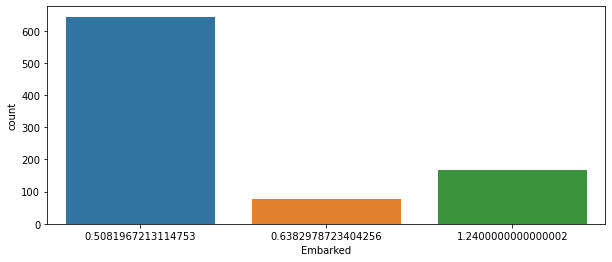

In [59]:
plt.figure(figsize = (10,4))
sns.countplot(prob_data)

This is the way of Probability Ratio Encoding


# Counter Frequency Encoding

Taking same Embarked cata

In [60]:
df = data.copy()

In [63]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
#Replace that with the frequency
dic = df['Embarked'].value_counts().to_dict()

In [65]:
df['Embarked'] = df['Embarked'].map(dic)

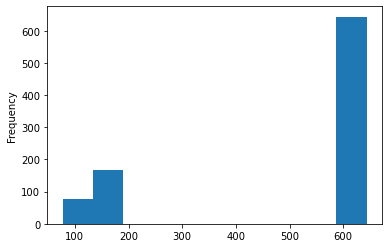

In [68]:
df['Embarked'].plot(kind = "hist")

# Encoding for the Ordinal Variables
# Label Encoding:

Considering the Same dataset by selecting cabin variable

In [70]:
df = data.copy()

In [72]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [73]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [76]:
lst = df['Cabin'].value_counts().index

In [81]:
dic = {j:i for i,j in enumerate(lst , 0)}

In [82]:
dic

{'n': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4, 'A': 5, 'F': 6, 'G': 7, 'T': 8}

In [83]:
#now map the dic to the variable

In [84]:
df['Cabin'] = df['Cabin'].map(dic)

0    687
1     59
2     47
3     33
4     32
5     15
6     13
7      4
8      1
Name: Cabin, dtype: int64


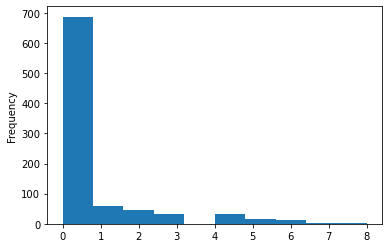

In [89]:
print(df['Cabin'].value_counts())
df['Cabin'].plot(kind = "hist")

# Target Guided Encoding

In [90]:
#it is based on the y variables

In [91]:
df = data.copy()

In [93]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [96]:
mean_val = df.groupby(['Embarked'])['Survived'].mean()

In [97]:
mean_val

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [99]:
lst = mean_val.index

In [100]:
lst

Index(['C', 'Q', 'S'], dtype='object', name='Embarked')

In [101]:
#mapping based the mean 
dic = {j:i for i,j in enumerate(lst,0)}

In [102]:
df['Embarked'] = df['Embarked'].map(dic)

In [104]:
df['Embarked'].value_counts()

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64